In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# df = pd.read_csv("../results/rssi_n10_10d_adr.csv")
# df = pd.read_csv("../results/rssi_n10_10d_noadr.csv")
df = pd.read_csv("../results/rssi_berlin_gw200m.csv")
df

,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:22:53-48944)",Unnamed: 1,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:22:53-48944).1",Unnamed: 3,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:22:53-48944).2",Unnamed: 5,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:22:53-48944).3",Unnamed: 7,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:22:53-48944).4",Unnamed: 9,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:22:53-48944).5",Unnamed: 11,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:22:53-48944).6",Unnamed: 13,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:22:53-48944).7",Unnamed: 15,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:22:53-48944).8",Unnamed: 17,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:22:53-48944).9",Unnamed: 19
0,552.770621,-66.181022,788.923275,-79.236812,797.596637,-68.377623,900.282520,-66.295901,924.945266,-69.974754,978.728558,-64.543102,1257.652892,-61.629168,1861.326344,-72.239270,1880.686186,-67.712414,1953.267471,-77.492956
1,553.970621,-66.181022,790.123275,-79.236812,798.796637,-68.377623,901.482520,-66.295901,926.145266,-69.974754,979.928558,-64.543102,1258.852892,-61.629168,1862.526344,-72.239270,1881.886186,-67.712414,1954.467471,-77.492956
2,1592.129922,-69.146993,1542.797385,-68.505879,2586.284301,-70.474186,2418.018497,-65.820440,1461.710986,-81.890520,1941.309497,-65.843559,1833.385299,-62.939799,2575.109937,-71.201602,2327.305648,-70.839901,2279.807886,-66.526051
3,2568.993996,-69.138827,2600.623799,-71.505532,3230.389011,-75.298169,3436.677227,-63.215656,2850.753674,-69.309433,2774.153016,-70.382953,2919.654680,-63.129725,3462.971348,-82.886929,3543.814302,-66.953513,2787.008007,-78.758163
4,4025.812555,-77.960694,4708.071404,-67.050590,7011.329969,-69.121660,3624.196178,-67.129828,4690.486459,-74.675301,6246.688495,-61.924180,4921.641175,-73.351449,4993.802574,-70.971124,4680.410797,-63.389774,3088.573923,-63.301629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,851507.434592,-63.482670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,851964.988475,-69.104357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852415.439632,-63.253213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858044.392265,-64.394087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# rssi_berlin_gw200m.csv
locations = [[822.0194698360865, 739.4046194171533, 23], [263.9939801048604, 299.80550314765424, 23], [468.6109037408023, 606.6390164084733, 23], [677.377121595724, 311.6158274188638, 5.1], [734.4841017249855, 487.4600875368342, 23], [714.6851075206068, 205.09913122281432, 19], [403.5160410553799, 136.8531596083194, 23], [220.07116886903532, 212.38414978329092, 23], [108.28748674801318, 581.6178667871282, 19], [511.31633024220355, 295.69291112665087, 23]]
distances = [516.2033160778699, 287.4027044977627, 253.44698927410218, 319.1623346760155, 338.974350190995, 388.0227564713546, 342.4698374797927, 361.5960649309987, 418.4688903961364, 227.65624182975756]
initial_node_order = ['node0', 'node1', 'node2', 'node3', 'node4', 'node5', 'node6', 'node7', 'node8', 'node9']
conditions = pd.DataFrame(distances, index=initial_node_order)
conditions

,0
node0,516.203316
node1,287.402704
node2,253.446989
node3,319.162335
node4,338.974350
node5,388.022756
node6,342.469837
node7,361.596065
node8,418.468890
node9,227.656242


In [37]:
df_count = pd.read_csv("../results/count_berlin_gw200m.csv")
df_count

,run,repetition,module,name,value
0,General-0-20230502-15:22:53-48944,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 0,542
1,General-0-20230502-15:22:53-48944,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 1,563
2,General-0-20230502-15:22:53-48944,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 2,585
3,General-0-20230502-15:22:53-48944,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 3,605
4,General-0-20230502-15:22:53-48944,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 4,621
5,General-0-20230502-15:22:53-48944,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 5,636
6,General-0-20230502-15:22:53-48944,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 6,661
7,General-0-20230502-15:22:53-48944,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 7,678
8,General-0-20230502-15:22:53-48944,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 8,698
9,General-0-20230502-15:22:53-48944,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 9,722


In [38]:
node_order = []
for i in ["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]:
    node_num = df_count.loc[df_count["value"] == df[i].count()-1].index[0]
    node_order.append("node"+str(node_num))
print(node_order)

['node8', 'node6', 'node0', 'node1', 'node4', 'node9', 'node2', 'node3', 'node7', 'node5']


In [39]:
rssi_values = df[["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]]
rssi_values.set_axis(node_order, axis='columns', inplace=True)
print(rssi_values.head())

       node8      node6      node0      node1      node4      node9  \
0 -66.181022 -79.236812 -68.377623 -66.295901 -69.974754 -64.543102   
1 -66.181022 -79.236812 -68.377623 -66.295901 -69.974754 -64.543102   
2 -69.146993 -68.505879 -70.474186 -65.820440 -81.890520 -65.843559   
3 -69.138827 -71.505532 -75.298169 -63.215656 -69.309433 -70.382953   
4 -77.960694 -67.050590 -69.121660 -67.129828 -74.675301 -61.924180   

       node2      node3      node7      node5  
0 -61.629168 -72.239270 -67.712414 -77.492956  
1 -61.629168 -72.239270 -67.712414 -77.492956  
2 -62.939799 -71.201602 -70.839901 -66.526051  
3 -63.129725 -82.886929 -66.953513 -78.758163  
4 -73.351449 -70.971124 -63.389774 -63.301629  


<AxesSubplot:>

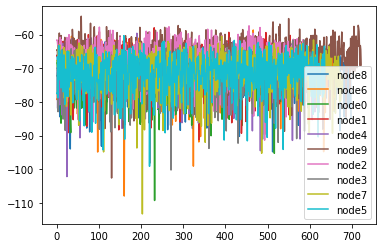

In [40]:
rssi_values.plot.line()

<AxesSubplot:ylabel='Frequency'>

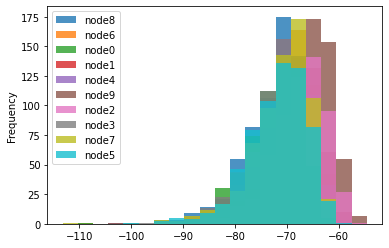

In [41]:
rssi_values.plot.hist(bins=20, alpha=0.8)

<AxesSubplot:>

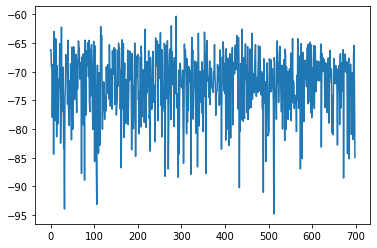

In [42]:
rssi_values["node8"].plot.line()

<AxesSubplot:ylabel='Frequency'>

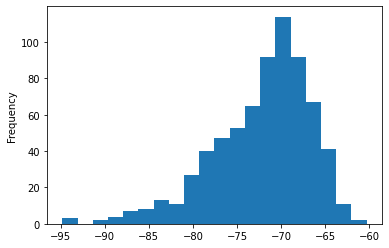

In [43]:
rssi_values["node8"].plot.hist(bins=20)

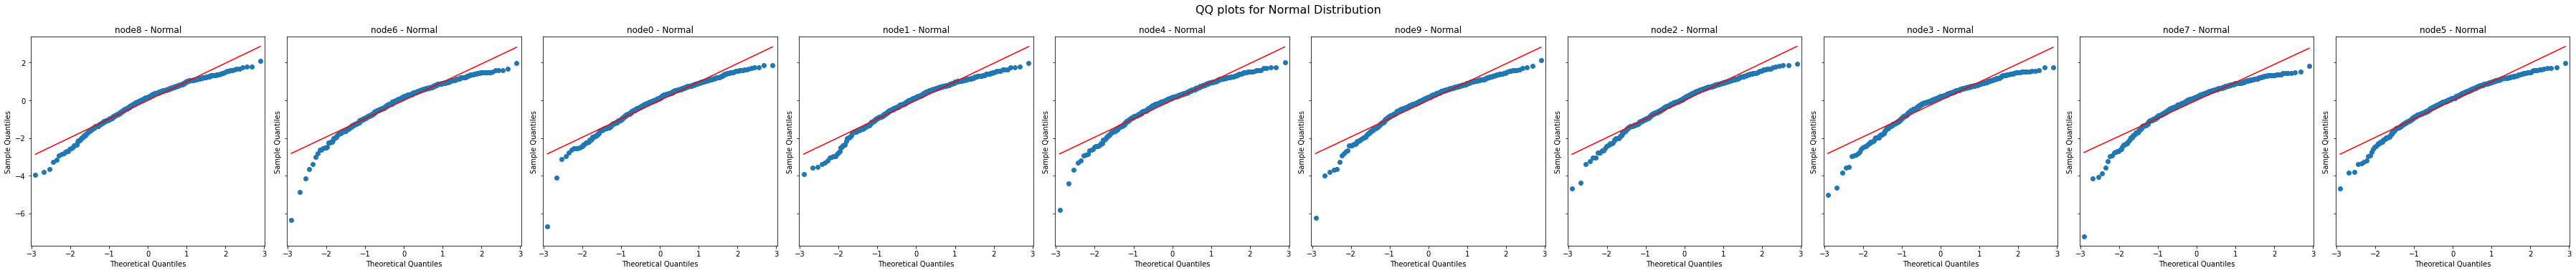

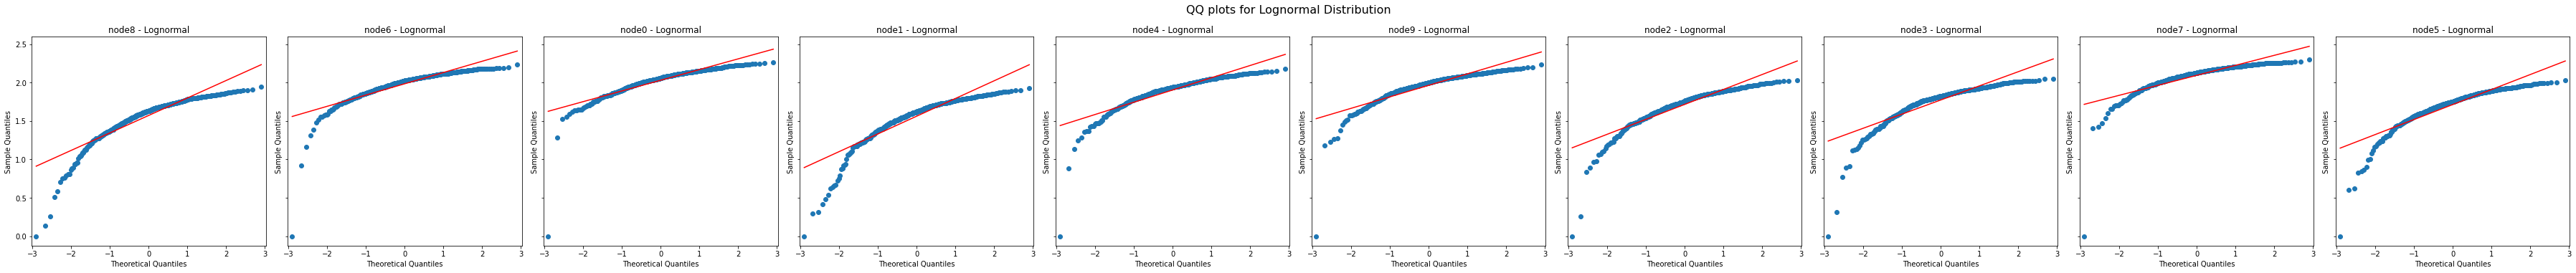

In [44]:
def plot_qq_statsmodels_horizontal(data, distribution_type):
    fig, ax = plt.subplots(1, len(data.columns), figsize=(5 * len(data.columns), 5), sharey=True)
    for idx, column in enumerate(data.columns):
        if distribution_type == "normal":
            sm.qqplot(data[column], line="r", ax=ax[idx])
        elif distribution_type == "lognormal":
            sm.qqplot(np.log(data[column] - data[column].min() + 1), line="r", ax=ax[idx])
        ax[idx].set_title(f"{column} - {distribution_type.capitalize()}")

    plt.tight_layout()
    plt.suptitle(f"QQ plots for {distribution_type.capitalize()} Distribution", fontsize=16, y=1.05)
    plt.show()


cleaned_rssi_values = rssi_values.dropna()
scaler = StandardScaler()
normalized_rssi_values = pd.DataFrame(scaler.fit_transform(cleaned_rssi_values), columns=cleaned_rssi_values.columns)


plot_qq_statsmodels_horizontal(normalized_rssi_values, "normal")
plot_qq_statsmodels_horizontal(normalized_rssi_values, "lognormal")


- norm dist because there is no multipath  
- the reason left end is above the line is that we cannot detect signal below -130dBm  

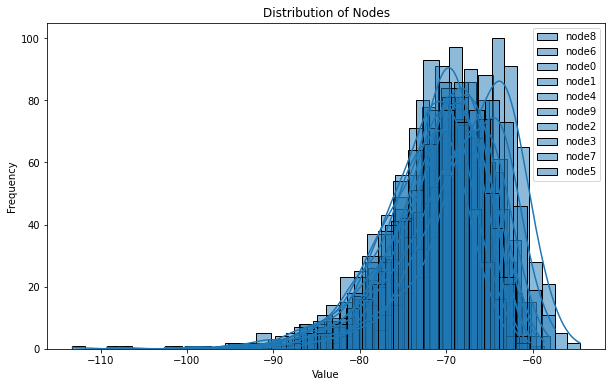

In [45]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create histograms or KDE plots for each node
for column in rssi_values.columns:
    sns.histplot(rssi_values[column], kde=True, ax=ax, label=column)

# Customize the plot
ax.set_title("Distribution of Nodes")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.legend()

# Display the plot
plt.show()

<AxesSubplot:>

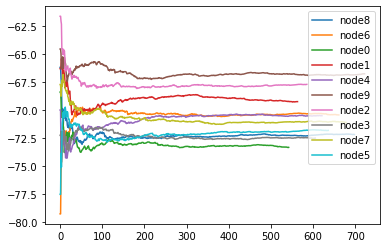

In [46]:
# Calculate the cumulative sum for each column
cumulative_sum = rssi_values.cumsum()

# Calculate the cumulative count for each column
cumulative_count = rssi_values.apply(lambda x: (x.notna().cumsum()))

# Compute the average value for each element by dividing cumulative sum by cumulative count
average_df = cumulative_sum / cumulative_count

# Display the new DataFrame with the average values
average_df.plot.line()

         distance       rssi
node0  516.203316 -73.308208
node1  287.402704 -69.235092
node2  253.446989 -67.697637
node3  319.162335 -72.483420
node4  338.974350 -70.487040
node5  388.022756 -71.797119
node6  342.469837 -70.421746
node7  361.596065 -71.091548
node8  418.468890 -72.165566
node9  227.656242 -66.756852


<AxesSubplot:xlabel='distance', ylabel='rssi'>

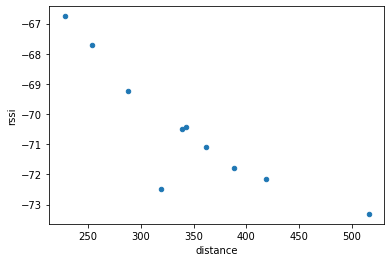

In [47]:
mean_rssi = pd.DataFrame(rssi_values.mean())
rssi_distance = pd.merge(conditions, mean_rssi, left_index=True, right_index=True)
rssi_distance.columns = ["distance", "rssi"]
print(rssi_distance)
rssi_distance.plot.scatter(x="distance",y="rssi")

{'node0': 516.2033160778699, 'node1': 287.4027044977627, 'node2': 253.44698927410218, 'node3': 319.1623346760155, 'node4': 338.974350190995, 'node5': 388.0227564713546, 'node6': 342.4698374797927, 'node7': 361.5960649309987, 'node8': 418.4688903961364, 'node9': 227.65624182975756}
node8
node6
node0
node1
node4
node9
node2
node3
node7
node5


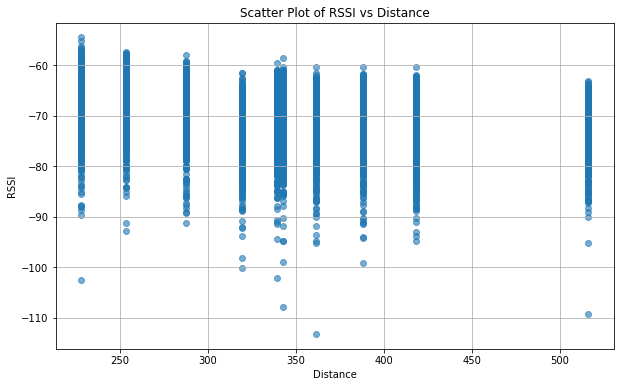

In [48]:
# Create a mapping from node names to their corresponding distance
node_to_distance = conditions.squeeze().to_dict()
print(node_to_distance)

# Create an empty array to store x (distance) and y (rssi) values for the scatter plot
x_values = []
y_values = []

# Iterate through the columns (nodes) in rssi_values
for node in rssi_values.columns:
    # Get the distance for the current node
    print(node)
    distance = node_to_distance[node]
    
    # Get the rssi values for the current node
    rssi_values_node = rssi_values[node].dropna()
    
    # Append the distance value to x_values as many times as there are rssi values
    x_values.extend([distance] * len(rssi_values_node))
    
    # Append the rssi values to y_values
    y_values.extend(rssi_values_node)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.6)

# Add labels and title
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Scatter Plot of RSSI vs Distance")

# Optionally, you can add a grid for better readability
plt.grid(True)

# Finally, display the plot
plt.show()



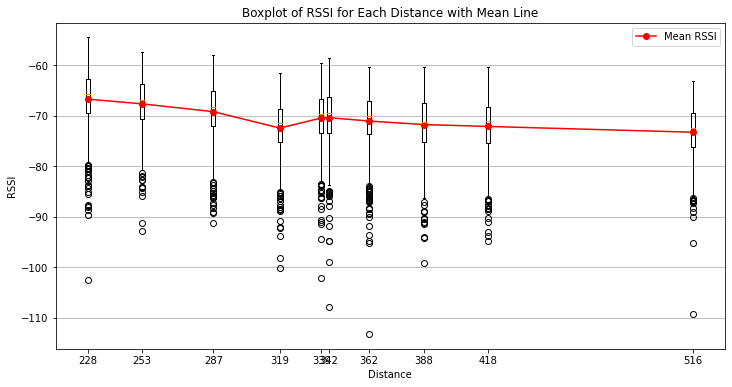

In [49]:
# Create a list of node names
node_names = rssi_values.columns

# Create a mapping from node names to their corresponding distance
node_to_distance = conditions.squeeze().to_dict()

# Create a list of distances corresponding to the node names
distances_list = [node_to_distance[node] for node in node_names]

# Initialize an empty list to store the data for box plots
box_plot_data = []

# Add the RSSI values for each node to the box_plot_data list
for node in node_names:
    box_plot_data.append(rssi_values[node].dropna().tolist())

# Create custom ticks and labels for the x-axis
xticks = distances_list
xticklabels = [int(round(dist)) for dist in xticks]

# Calculate the mean RSSI for each node
mean_rssi_values = [np.mean(rssi) for rssi in box_plot_data]

# Sort the data by distances
sorted_data = sorted(zip(distances_list, box_plot_data, mean_rssi_values))
sorted_distances, sorted_box_plot_data, sorted_mean_rssi_values = zip(*sorted_data)

# Create a box plot for each node with distance on the x-axis
plt.figure(figsize=(12, 6), facecolor="white")
plt.boxplot(sorted_box_plot_data, positions=sorted_distances, widths=2)

# Set custom ticks and labels for the x-axis
sorted_xticks = sorted(xticks)
sorted_xticklabels = [str(int(round(d))) for d in sorted_xticks]
plt.xticks(sorted_xticks, sorted_xticklabels)

# Add labels and title
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Boxplot of RSSI for Each Distance with Mean Line")

# Optionally, you can add a grid for better readability
plt.grid(axis='y')

# Plot a line connecting the mean RSSI values for each node
plt.plot(sorted_distances, sorted_mean_rssi_values, marker='o', linestyle='-', color='red', label='Mean RSSI')

# Add a legend to the plot
plt.legend()

# Finally, display the plot
plt.show()




# prediction